In [3]:
import os
from pydub import AudioSegment
from pydub.silence import detect_nonsilent, split_on_silence
from scipy.io import wavfile
import noisereduce as nr
import numpy as np

def remove_noise(audio_file, output_folder):
    """
    Removes background noise from an audio file and saves the cleaned audio to the output folder.
    """
    # Load the audio file
    audio = AudioSegment.from_file(audio_file)
    
    # Convert to mono for processing (if needed)
    if audio.channels > 1:
        audio = audio.set_channels(1)
    
    # Noise removal using silence-based detection
    # Splitting audio into non-silent chunks
    nonsilent_chunks = split_on_silence(
        audio,
        min_silence_len=500,  # Minimum silence length in ms
        silence_thresh=audio.dBFS - 14  # Threshold for silence (adjust as needed)
    )
    
    # Reconstruct the audio by concatenating chunks
    cleaned_audio = AudioSegment.empty()
    for chunk in nonsilent_chunks:
        cleaned_audio += chunk
    
    # Save the cleaned audio to the output folder
    output_path = os.path.join(output_folder, os.path.basename(audio_file))
    cleaned_audio.export(output_path, format="wav")
    print(f"Processed and saved: {output_path}")

def process_audio_folder(input_folder, output_folder):
    """
    Processes all audio files in the input folder, removes noise, and saves them to the output folder.
    """
    # Ensure output folder exists
    os.makedirs(output_folder, exist_ok=True)
    
    # Loop through all files in the input folder
    for file_name in os.listdir(input_folder):
        input_path = os.path.join(input_folder, file_name)
        
        # Process only audio files (e.g., .wav, .mp3)
        if file_name.endswith((".wav", ".mp3")):
            remove_noise(input_path, output_folder)
        else:
            print(f"Skipping non-audio file: {file_name}")

# Example usage
input_folder = "wav_files"  # Replace with your input folder path
output_folder = "cleaned_wav_files"  # Replace with your output folder path

process_audio_folder(input_folder, output_folder)

/Users/rittique/Python_Projects/Filled_Pause_detection/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Processed and saved: cleaned_wav_files/Voice 007_sd.wav
Processed and saved: cleaned_wav_files/R1.wav
Processed and saved: cleaned_wav_files/Voice 004.wav
Processed and saved: cleaned_wav_files/omg dj.wav
Processed and saved: cleaned_wav_files/practice .wav
Processed and saved: cleaned_wav_files/Voice 006.wav
Processed and saved: cleaned_wav_files/Voice 001_sd (1).wav
Processed and saved: cleaned_wav_files/Sep 25, 1.56 sa.wav
Processed and saved: cleaned_wav_files/R3.wav
Processed and saved: cleaned_wav_files/R2.wav
Processed and saved: cleaned_wav_files/Voice 007.wav
Processed and saved: cleaned_wav_files/hjjjhhggh.wav
Processed and saved: cleaned_wav_files/tamanna.wav
Processed and saved: cleaned_wav_files/Voice 003.wav
Processed and saved: cleaned_wav_files/Oct 8, 1.45 PM.wav
Skipping non-audio file: .DS_Store
Processed and saved: cleaned_wav_files/R7.wav
Processed and saved: cleaned_wav_files/Voice 002.wav
Processed and saved: cleaned_wav_files/cricket toppic.wav
Processed and save

In [4]:
import json
import librosa
import numpy as np
import pandas as pd

# Paths to JSON and audio files
json_folder = 'JSON'
audio_folder = 'wav_files'

# Match audio and JSON files
json_files = {os.path.splitext(f)[0]: os.path.join(json_folder, f) for f in os.listdir(json_folder) if f.endswith('.json')}
audio_files = {os.path.splitext(f)[0]: os.path.join(audio_folder, f) for f in os.listdir(audio_folder) if f.endswith(('.wav', '.m4a', '.mp3'))}

matched_files = {name: (json_files[name], audio_files[name]) for name in json_files if name in audio_files}

print(matched_files)

{'cricket toppic': ('JSON/cricket toppic.json', 'wav_files/cricket toppic.wav'), 'R1': ('JSON/R1.json', 'wav_files/R1.wav'), 'New Recording 6': ('JSON/New Recording 6.json', 'wav_files/New Recording 6.wav'), 'Mirpur Road': ('JSON/Mirpur Road.json', 'wav_files/Mirpur Road.wav'), 'Recording_1': ('JSON/Recording_1.json', 'wav_files/Recording_1.wav'), 'Oct 7, 9.34 AM': ('JSON/Oct 7, 9.34 AM.json', 'wav_files/Oct 7, 9.34 AM.wav'), 'keralas calture': ('JSON/keralas calture.json', 'wav_files/keralas calture.wav'), 'the scientist': ('JSON/the scientist.json', 'wav_files/the scientist.wav'), 'Recording_2': ('JSON/Recording_2.json', 'wav_files/Recording_2.wav'), 'R5': ('JSON/R5.json', 'wav_files/R5.wav'), 'Sep 23, 9.24 AM': ('JSON/Sep 23, 9.24 AM.json', 'wav_files/Sep 23, 9.24 AM.wav'), 'English 1st conversation': ('JSON/English 1st conversation.json', 'wav_files/English 1st conversation.wav'), 'SS practice': ('JSON/SS practice.json', 'wav_files/SS practice.wav'), 'sanjid meyad': ('JSON/sanjid m

In [5]:
print(len(matched_files))

18


In [6]:
def load_annotations(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    annotations = []
    for item in data[0]['annotations'][0]['result']:
        if item['type'] == 'labels':
            start = item['value']['start']
            end = item['value']['end']
            label = item['value']['labels'][0]
            annotations.append((start, end, label))
    return annotations

def extract_audio_segments(audio_file, annotations, sr=16000):
    y, _ = librosa.load(audio_file, sr=sr)
    segments = []
    for start, end, label in annotations:
        segment = y[int(start * sr):int(end * sr)]
        segments.append((segment, label))
    return segments

dataset = []
files_loaded = []

for name, (json_path, audio_path) in matched_files.items():
    if len(load_annotations(json_path)) != 0:
        files_loaded.append(json_path)
        annotations = load_annotations(json_path)
        audio_segments = extract_audio_segments(audio_path, annotations)
        dataset.extend(audio_segments)

In [7]:
print(files_loaded)

['JSON/cricket toppic.json', 'JSON/R1.json', 'JSON/New Recording 6.json', 'JSON/Mirpur Road.json', 'JSON/Recording_1.json', 'JSON/Oct 7, 9.34 AM.json', 'JSON/keralas calture.json', 'JSON/the scientist.json', 'JSON/Recording_2.json', 'JSON/R5.json', 'JSON/Sep 23, 9.24 AM.json', 'JSON/English 1st conversation.json', 'JSON/SS practice.json', 'JSON/sanjid meyad.json', 'JSON/Sep 25, 1.56 sa.json', 'JSON/Oct 20, 12.28 PM.json', 'JSON/Oct 6, 9.10 AM.json', 'JSON/R2.json']


In [8]:
def extract_features(segments, n_mfcc=40, max_length=300):
    features, labels = [], []
    for i, (segment, label) in enumerate(segments):
        try:
            # Dynamically adjust n_fft based on signal length
            n_fft = min(2048, len(segment))  # Use the smaller of 2048 or segment length

            # Extract MFCC features with adjusted n_fft
            mfcc = librosa.feature.mfcc(y=segment, sr=16000, n_mfcc=n_mfcc, n_fft=n_fft)

            # Handle variable lengths (pad if short, truncate if long)
            if mfcc.shape[1] < max_length:
                padded_mfcc = np.pad(mfcc, ((0, 0), (0, max_length - mfcc.shape[1])), mode='constant')
            else:
                padded_mfcc = mfcc[:, :max_length]

            # Append features and labels
            features.append(padded_mfcc.T)
            labels.append(0 if label == 'Field pause' else 1)

        except Exception as e:
            print(f"Error processing segment {i}: {e}")

    return np.array(features), np.array(labels)

X, y = extract_features(dataset)

In [29]:
X.shape

(1423, 300, 40)

In [30]:
y.shape

(1423,)

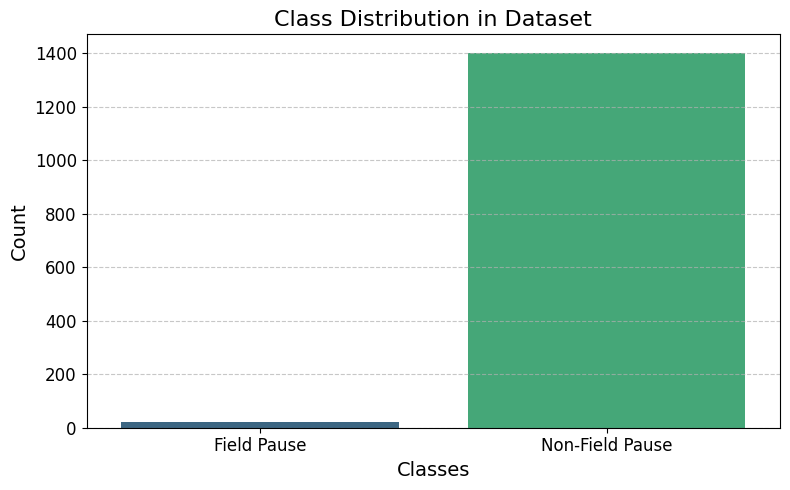

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each class
unique_classes, class_counts = np.unique(y, return_counts=True)

# Create a bar plot for the class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=unique_classes, y=class_counts, palette="viridis")

# Set plot labels and title
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Class Distribution in Dataset", fontsize=16)
plt.xticks(ticks=unique_classes, labels=["Field Pause", "Non-Field Pause"], fontsize=12)  # Adjust labels if needed
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
# Extract features (e.g., MFCC or others)
# Assuming `features` is now 2D
scaler = StandardScaler()
# Flatten the 3D array into 2D
X_flat = X.reshape(X.shape[0], -1)
X_scaled = scaler.fit_transform(X_flat)

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

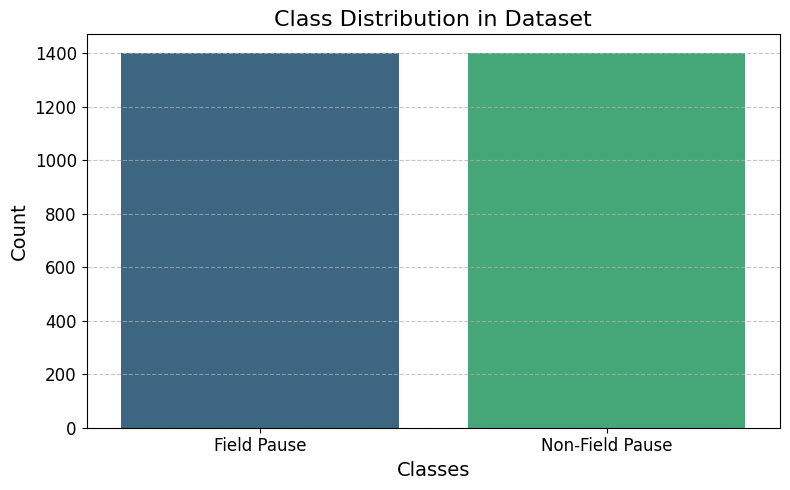

In [15]:
# Count occurrences of each class
unique_classes, class_counts = np.unique(y_resampled, return_counts=True)

# Create a bar plot for the class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=unique_classes, y=class_counts, palette="viridis")

# Set plot labels and title
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Class Distribution in Dataset", fontsize=16)
plt.xticks(ticks=unique_classes, labels=["Field Pause", "Non-Field Pause"], fontsize=12)  # Adjust labels if needed
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## Without Focal Loss

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, GlobalAveragePooling1D

# Transformer block
def transformer_block(inputs, head_size, num_heads, ff_dim, dropout_rate=0.1):
    # Multi-head attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout_rate)(x, x)
    x = Dropout(dropout_rate)(x)
    res = x + inputs  # Residual connection

    # Feedforward layer
    x = LayerNormalization(epsilon=1e-6)(res)
    x = tf.keras.Sequential([
        Dense(ff_dim, activation="relu"),
        Dense(inputs.shape[-1]),  # Match input shape for residual connection
    ])(x)
    return x + res  # Add residual connection

# Transformer model
def build_transformer_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = transformer_block(inputs, head_size=64, num_heads=4, ff_dim=128)
    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.1)(x)
    outputs = Dense(num_classes, activation="softmax")(x)
    return tf.keras.Model(inputs, outputs)

# Build and compile the model
input_shape = (chunk_size, feature_dim)  # (300, 40)
num_classes = 2
model = build_transformer_model(input_shape=input_shape, num_classes=num_classes)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 300, 40)]            0         []                            
                                                                                                  
 layer_normalization_2 (Lay  (None, 300, 40)              80        ['input_2[0][0]']             
 erNormalization)                                                                                 
                                                                                                  
 multi_head_attention_1 (Mu  (None, 300, 40)              41768     ['layer_normalization_2[0][0]'
 ltiHeadAttention)                                                  , 'layer_normalization_2[0][0]
                                                                    ']                      

In [40]:
import tensorflow as tf
from tensorflow.keras import backend as K

def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        # Ensure y_true is float32 to match y_pred
        y_true = tf.cast(y_true, tf.float32)
        
        # Clip predictions to prevent NaNs in case of extreme values
        y_pred = tf.clip_by_value(y_pred, K.epsilon(), 1. - K.epsilon())
        
        # Cross entropy
        cross_entropy = -y_true * tf.math.log(y_pred)
        
        # Compute focal loss
        loss = alpha * tf.pow(1 - y_pred, gamma) * cross_entropy
        return tf.reduce_sum(loss, axis=-1)
    
    return focal_loss_fixed

In [41]:
print(X_resampled.shape)
print(y_resampled.shape)

(2800, 12000)
(2800,)


In [42]:
from sklearn.model_selection import train_test_split

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Epoch 1/10
